# Wine Classification Using Ensemble Method From Scratch

### Project Overview

The goal of this project is to predict the class of wine based on the features provided in the wine.csv dataset using ensemble learning methods implemented from scratch. Ensemble methods combine multiple individual models to improve prediction accuracy and generalizability.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set(color_codes=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, zero_one_loss, hamming_loss

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Dataset Input

Since column headers are not correct, assign corrections to a variable for later use. Update data with corrected headers using previously defined variable

In [2]:
column_headers = ['Class','Alcohol','Malic Acid','Ash','Alcalinity of ash',
                                                               'Magnesium','Total phenols','Flavanoids',
                                                               'Nonflavanoid phenols','Proanthocyanins',
                                                               'Color intensity','Hue','OD280/OD315 of diluted df_wines',
                                                               'Proline']

In [3]:
df_wine = pd.read_csv('./Wine.csv', header=None, names=column_headers)
df_wine

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted df_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### EDA

In [4]:
df_wine.isnull().sum()

Class                              0
Alcohol                            0
Malic Acid                         0
Ash                                0
Alcalinity of ash                  0
Magnesium                          0
Total phenols                      0
Flavanoids                         0
Nonflavanoid phenols               0
Proanthocyanins                    0
Color intensity                    0
Hue                                0
OD280/OD315 of diluted df_wines    0
Proline                            0
dtype: int64

In [5]:
df_wine.describe()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted df_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df_wine.groupby('Class')['Class'].count()

Class
1    59
2    71
3    48
Name: Class, dtype: int64

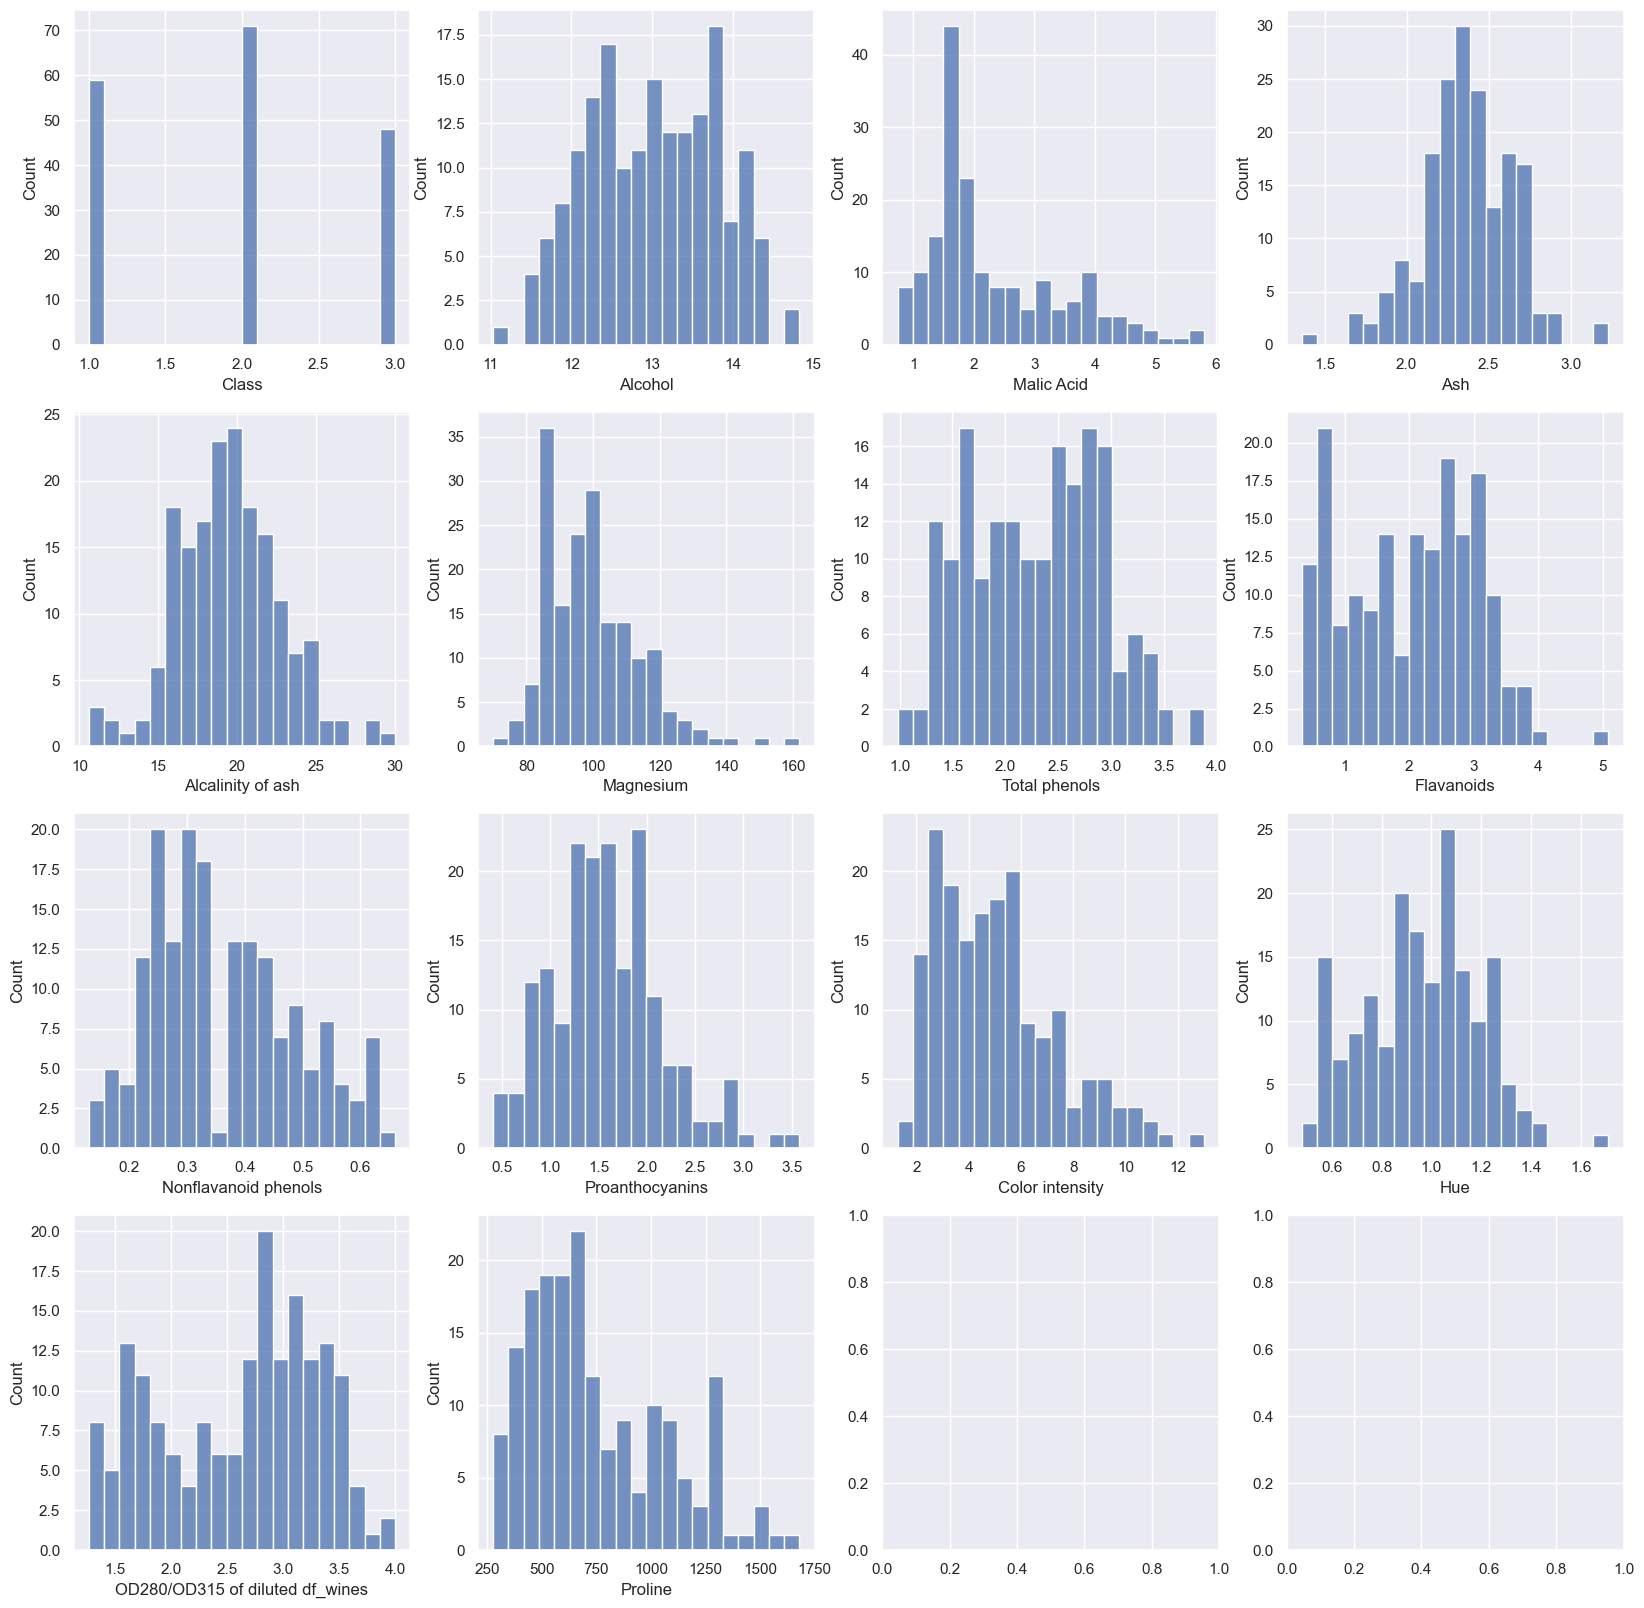

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
i = 0
j = 0
for vars in df_wine.columns :
    sns.histplot(data = df_wine, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0

In [8]:
class_1 = list()
class_2 = list()
class_3 = list()
for row in df_wine.values :
    if row[0] == 1:
        class_1.append(row)
    elif row[0] == 2:
        class_2.append(row)
    else :
        class_3.append(row)
df_class_1 = pd.DataFrame(class_1, columns = df_wine.columns)
df_class_2 = pd.DataFrame(class_2, columns = df_wine.columns)
df_class_3 = pd.DataFrame(class_3, columns = df_wine.columns)

In [9]:
del df_class_1['Class']
del df_class_2['Class']
del df_class_3['Class']

In [10]:
means = list()

In [11]:
means.append(df_class_1.mean())
means.append(df_class_2.mean())
means.append(df_class_3.mean())

In [12]:
df_means = pd.DataFrame(means, columns = df_class_1.columns,
                        index = range(1,4))
df_means

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted df_wines,Proline
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [13]:
medians = list()
medians.append(df_class_1.median())
medians.append(df_class_2.median())
medians.append(df_class_3.median())

In [14]:
df_medians = pd.DataFrame(medians, columns = df_class_1.columns,
                        index = range(1,4))
df_medians

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted df_wines,Proline
1,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
2,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
3,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


Text(0.5, 1.0, 'Alcohol Dist')

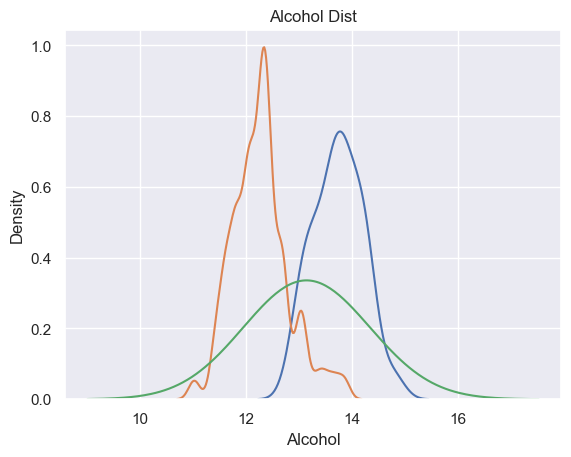

In [15]:
sns.kdeplot(df_class_1['Alcohol'], label = 'class_1')
sns.kdeplot(df_class_2['Alcohol'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Alcohol'], bw=2, label='class_3').set_title('Alcohol Dist')

In [16]:
print('Mean')
print(df_means['Alcohol'].values)
print('Median')
print(df_medians['Alcohol'].values)

Mean
[13.74474576 12.27873239 13.15375   ]
Median
[13.75  12.29  13.165]


Text(0.5, 1.0, 'Malic Acid Dist')

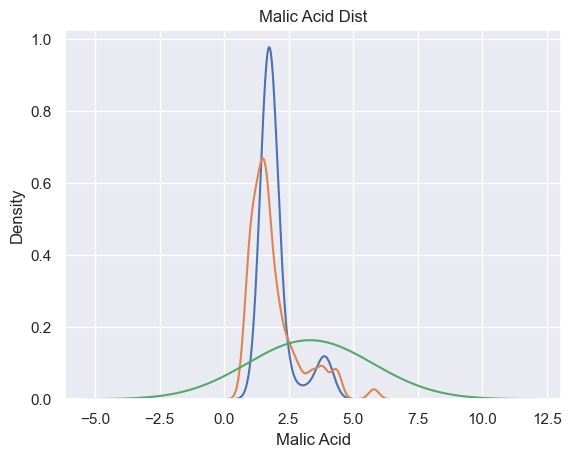

In [17]:
sns.kdeplot(df_class_1['Malic Acid'], label = 'class_1')
sns.kdeplot(df_class_2['Malic Acid'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Malic Acid'], bw=2, label='class_3').set_title('Malic Acid Dist')

In [18]:
print('Mean')
print(df_means['Malic Acid'].values)
print('Median')
print(df_medians['Malic Acid'].values)

Mean
[2.01067797 1.93267606 3.33375   ]
Median
[1.77  1.61  3.265]


Text(0.5, 1.0, 'Ash Dist')

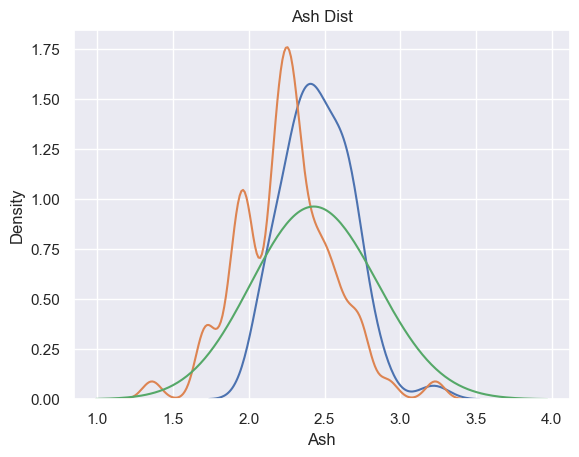

In [19]:
sns.kdeplot(df_class_1['Ash'], label = 'class_1')
sns.kdeplot(df_class_2['Ash'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Ash'], bw=2, label='class_3').set_title('Ash Dist')

In [20]:
print('Mean')
print(df_means['Ash'].values)
print('Median')
print(df_medians['Ash'].values)

Mean
[2.45559322 2.24478873 2.43708333]
Median
[2.44 2.24 2.38]


Text(0.5, 1.0, 'Alcalinity of ash Dist')

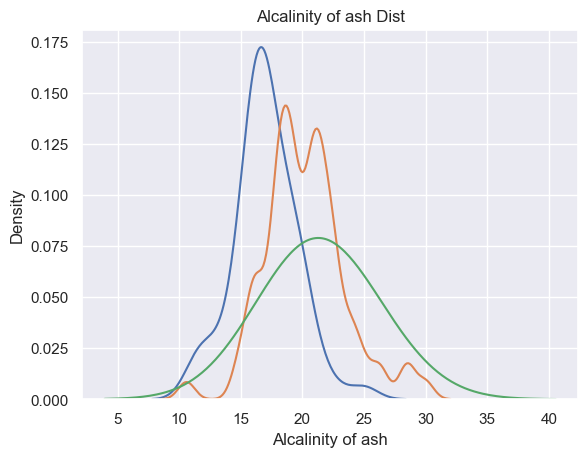

In [21]:
sns.kdeplot(df_class_1['Alcalinity of ash'], label = 'class_1')
sns.kdeplot(df_class_2['Alcalinity of ash'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Alcalinity of ash'], bw=2, label='class_3').set_title('Alcalinity of ash Dist')

In [22]:
print('Mean')
print(df_means['Alcalinity of ash'].values)
print('Median')
print(df_medians['Alcalinity of ash'].values)

Mean
[17.03728814 20.23802817 21.41666667]
Median
[16.8 20.  21. ]


Text(0.5, 1.0, 'Magnesium Dist')

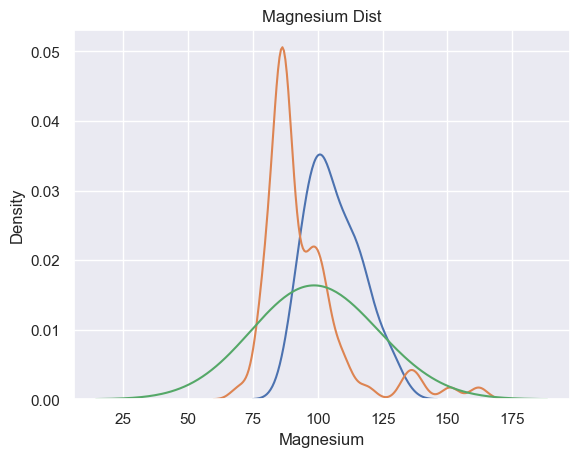

In [23]:
sns.kdeplot(df_class_1['Magnesium'], label = 'class_1')
sns.kdeplot(df_class_2['Magnesium'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Magnesium'], bw=2, label='class_3').set_title('Magnesium Dist')

In [24]:
print('Mean')
print(df_means['Magnesium'].values)
print('Median')
print(df_medians['Magnesium'].values)

Mean
[106.33898305  94.54929577  99.3125    ]
Median
[104.  88.  97.]


Text(0.5, 1.0, 'Total phenols Dist')

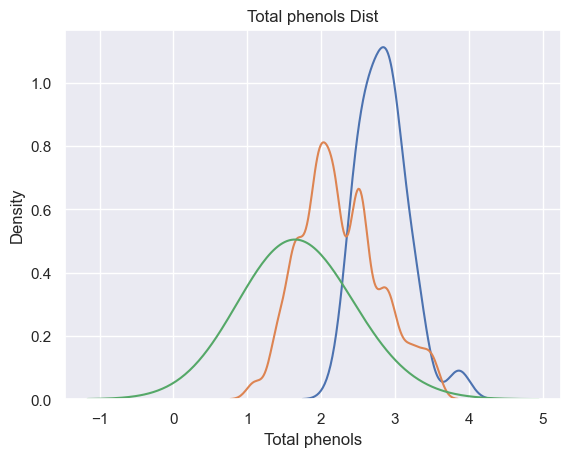

In [25]:
sns.kdeplot(df_class_1['Total phenols'], label = 'class_1')
sns.kdeplot(df_class_2['Total phenols'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Total phenols'], bw=2, label='class_3').set_title('Total phenols Dist')

In [26]:
print('Mean')
print(df_means['Total phenols'].values)
print('Median')
print(df_medians['Total phenols'].values)

Mean
[2.84016949 2.25887324 1.67875   ]
Median
[2.8   2.2   1.635]


Text(0.5, 1.0, 'Flavanoids Dist')

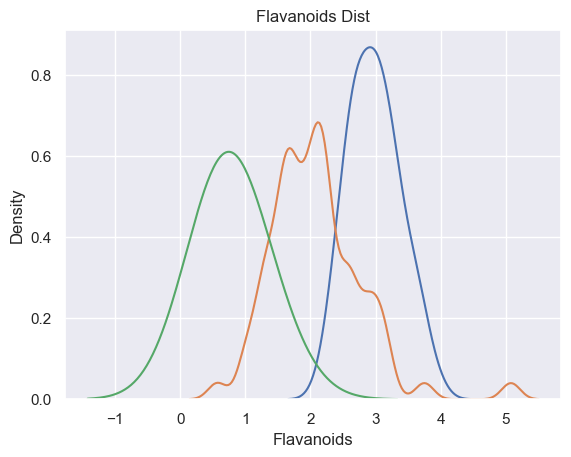

In [27]:
sns.kdeplot(df_class_1['Flavanoids'], label = 'class_1')
sns.kdeplot(df_class_2['Flavanoids'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Flavanoids'], bw=2, label='class_3').set_title('Flavanoids Dist')

In [28]:
print('Mean')
print(df_means['Flavanoids'].values)
print('Median')
print(df_medians['Flavanoids'].values)

Mean
[2.98237288 2.08084507 0.78145833]
Median
[2.98  2.03  0.685]


Text(0.5, 1.0, 'Nonflavanoid phenols Dist')

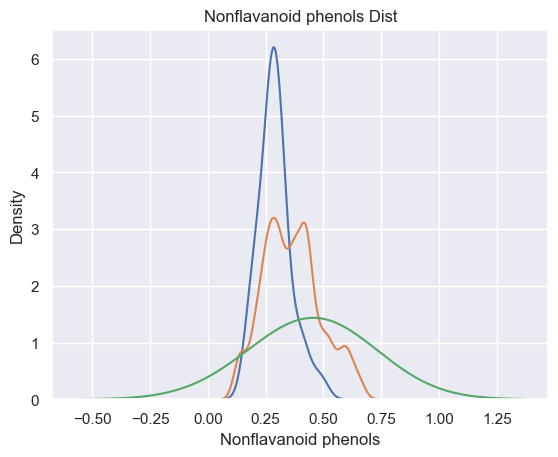

In [29]:
sns.kdeplot(df_class_1['Nonflavanoid phenols'], label = 'class_1')
sns.kdeplot(df_class_2['Nonflavanoid phenols'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Nonflavanoid phenols'], bw=2, label='class_3').set_title('Nonflavanoid phenols Dist')

In [30]:
print('Mean')
print(df_means['Nonflavanoid phenols'].values)
print('Median')
print(df_medians['Nonflavanoid phenols'].values)

Mean
[0.29       0.36366197 0.4475    ]
Median
[0.29 0.37 0.47]


Text(0.5, 1.0, 'Proanthocyanins Dist')

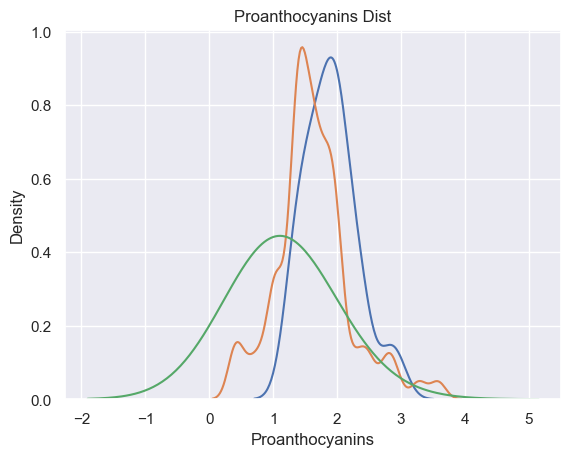

In [31]:
sns.kdeplot(df_class_1['Proanthocyanins'], label = 'class_1')
sns.kdeplot(df_class_2['Proanthocyanins'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Proanthocyanins'], bw=2, label='class_3').set_title('Proanthocyanins Dist')

In [32]:
print('Mean')
print(df_means['Proanthocyanins'].values)
print('Median')
print(df_medians['Proanthocyanins'].values)

Mean
[1.89932203 1.63028169 1.15354167]
Median
[1.87  1.61  1.105]


Text(0.5, 1.0, 'Color intensity Dist')

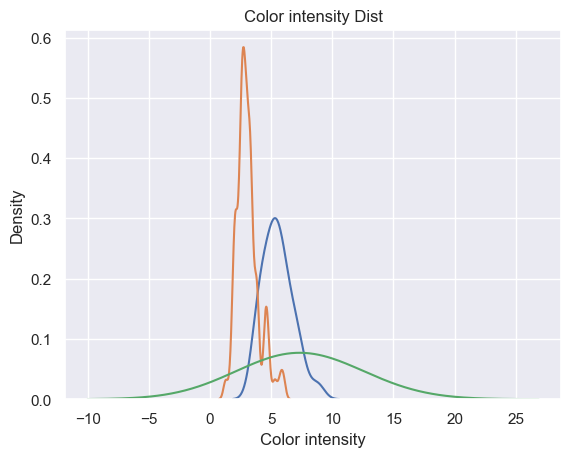

In [33]:
sns.kdeplot(df_class_1['Color intensity'], label = 'class_1')
sns.kdeplot(df_class_2['Color intensity'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Color intensity'], bw=2, label='class_3').set_title('Color intensity Dist')

In [34]:
print('Mean')
print(df_means['Color intensity'].values)
print('Median')
print(df_medians['Color intensity'].values)

Mean
[5.52830508 3.08661972 7.39624998]
Median
[5.4  2.9  7.55]


Text(0.5, 1.0, 'Hue Dist')

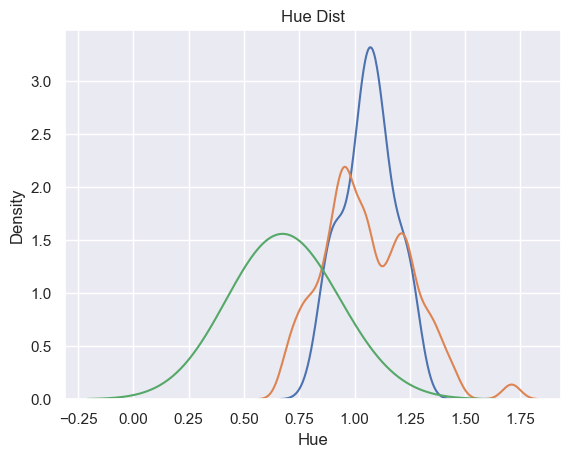

In [35]:
sns.kdeplot(df_class_1['Hue'], label = 'class_1')
sns.kdeplot(df_class_2['Hue'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Hue'], bw=2, label='class_3').set_title('Hue Dist')

In [36]:
print('Mean')
print(df_means['Hue'].values)
print('Median')
print(df_medians['Hue'].values)

Mean
[1.0620339  1.05628169 0.68270833]
Median
[1.07  1.04  0.665]


Text(0.5, 1.0, 'OD280/OD315 of diluted df_wines Dist')

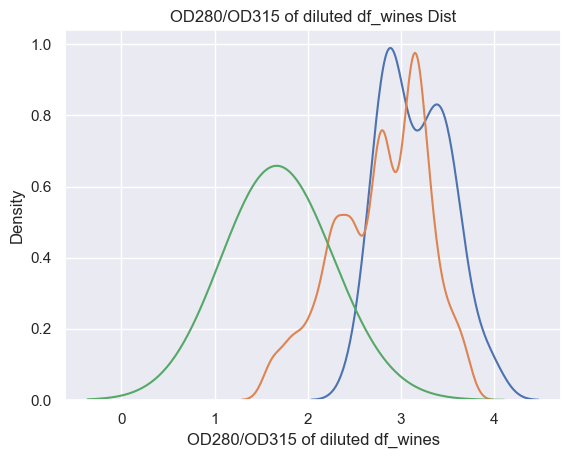

In [37]:
sns.kdeplot(df_class_1['OD280/OD315 of diluted df_wines'], label = 'class_1')
sns.kdeplot(df_class_2['OD280/OD315 of diluted df_wines'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['OD280/OD315 of diluted df_wines'], bw=2, label='class_3').set_title('OD280/OD315 of diluted df_wines Dist')

In [38]:
print('Mean')
print(df_means['OD280/OD315 of diluted df_wines'].values)
print('Median')
print(df_medians['OD280/OD315 of diluted df_wines'].values)

Mean
[3.15779661 2.78535211 1.68354167]
Median
[3.17 2.83 1.66]


Text(0.5, 1.0, 'Proline Dist')

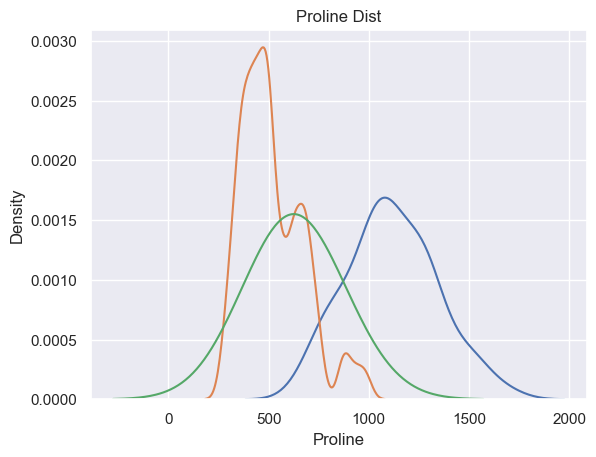

In [39]:
sns.kdeplot(df_class_1['Proline'], label = 'class_1')
sns.kdeplot(df_class_2['Proline'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Proline'], bw=2, label='class_3').set_title('Proline Dist')

In [40]:
print('Mean')
print(df_means['Proline'].values)
print('Median')
print(df_medians['Proline'].values)

Mean
[1115.71186441  519.50704225  629.89583333]
Median
[1095.   495.   627.5]


### Training

In [41]:
df_wine = df_wine[df_wine['Class'] !=1] # drop 1 class
y = df_wine['Class'].values
X = df_wine.drop(['Class'], axis=1).values
# encode the data and split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
y[y==0] = -1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [42]:
def label_it(D,w):
  """ return the most likely class """

  X,y = D

  cls = np.unique(y)
  cl_w = [sum(w[y==cl]) for cl in cls]
  #v,c = np.unique(y,return_counts=True)
  ind = np.argmax(cl_w)
  return cls[ind]

def to_freq(y,w,debug=False):
  """convert to frequencies for each class"""
  p =np.array([len(y[y==cl])/len(y) for cl in np.unique(y)])
  weight = np.array([sum(w[y==cl]) for cl in np.unique(y)])
  if debug:
    print('from function to_freq',p)
  return p,weight

def split_data(D,split):
  """split the data set"""
  X,y = D
  idx, threshold = split
  idx=int(idx)

  idx_l = X[:,idx] <= threshold;
  idx_r = X[:,idx] > threshold;

  Xl=X[X[:,idx] <= threshold,:]
  yl=y[X[:,idx] <= threshold]
  Xr=X[X[:,idx] > threshold,:]
  yr=y[X[:,idx] > threshold]

  Dl = (Xl,yl)
  Dr = (Xr,yr)
  return (Dl,Dr,idx_l,idx_r)


def get_thresholds_from_vec(x):
  """ thresholds are the middle points of consecutive unique points """
  return 0.5*np.diff(np.unique(x)) + np.unique(x)[:-1]

def get_threshold_from_mat(X):
  """ call get_thresholds from vec, and zip all the results """
  ns,nf = X.shape
  tmp=[get_thresholds_from_vec(X[:,i]) for i in range(nf)]
  ids = np.concatenate([(i*np.ones(len(item))) for i, item in zip(np.arange(nf),tmp)])
  return [(idx,t) for idx, t in zip(ids,np.concatenate(tmp))]

def get_imp(p,w,metric='entropy'):
  """ Calculate the impurity index
  p: is the probability vector, the sum of which equal to 1 """
  return {
       'entropy': (-p*np.log2(p)).dot(w),
       'error' : (1-np.max(p))*w[np.argmax(p)],
       'gini': (p*(1-p)).dot(w)
      }.get(metric)

def info_gain(D,split,w,metric='entropy'):
  """ the information gain of a given split
  split: (idx_feature, threshold) is a tuple """
  Dl,Dr,idx_l,idx_r = split_data(D,split)
  Nl = sum(w[idx_l])#len(Dl[1])
  Nr = sum(w[idx_r])#len(Dr[1])
  Np = sum(w)#len(D[1])
  pl,weight_l =  to_freq(Dl[1],w[idx_l])
  pr,weight_r = to_freq(Dr[1],w[idx_r])
  p,weight = to_freq(D[1],w)
  Il = get_imp(pl,weight_l,metric=metric)
  Ir = get_imp(pr,weight_r,metric=metric)
  Ip = get_imp(p,weight,metric=metric)
  return Np*(Ip - Nl/Np * Il - Nr/Np*Ir)


###################################################
# class definition
class BT_node(object):
  """ a simple binary tree node base class"""
  def __init__(self,Data=None,weight=None,parent=None,metric='entropy',max_depth=1):
    self.Data = Data
    self.w = weight
    self.parent = parent
    self.metric = metric
    self.max_depth=max_depth

  def update(self):
    X,y = self.Data
    if self.w is None:
        self.w= np.ones(y)/len(y)
    self.level = self.parent.level+1 if self.parent is not None  else 0
    self.label = label_it(self.Data,self.w)

    sps = get_threshold_from_mat(X)
    # number of samples are 1 or zero || uniform class || max level reached || some features are identical, but labels are different
    if len(y) <= 1 or self.level>=self.max_depth or len(sps)==0:
        self.lchild = None
        self.rchild = None
        self.split = None
    else:
        split,Dl,Dr,wl,wr = self.get_child(sps)
        self.lchild = BT_node(Data=Dl,weight=wl,parent=self,max_depth=self.max_depth)
        self.lchild.update()
        self.rchild = BT_node(Data=Dr,weight=wr,parent=self,max_depth=self.max_depth)
        self.rchild.update()
        self.split = split
        self.updated = True
        return self

  def get_child(self,sps):
    """ train the decision tree """
    X,y = self.Data
    IGs = np.array([info_gain((X,y),sp,self.w,self.metric) for sp in sps])
    # return the first maximum information gain
    cond = IGs==np.max(IGs)
    self.IG_max = IGs[cond]
    tmp = np.array(sps)[cond]
    split = (int(tmp[0,0]),tmp[0,1])
    # calculate the class label
    Dl,Dr,idx_l,idx_r = split_data((X,y),split)
    return (split,Dl,Dr,self.w[idx_l],self.w[idx_r])


  def info(self):
    """ print out informations """
    # print('split is: ',self.split)
    # print('childrens are: ',self.lchild,self.rchild)
    # print('node depth is: ',self.level)
    # print('parent is: ',self.parent)



class Decision_Tree(object):
  """ Decision Tree"""
  def __init__(self,max_depth=3,random_state=1,impurity_fun='entropy',debug=False):
    self.random_state=random_state
    self.impurity_fun = impurity_fun
    self.max_depth = max_depth
    self.debug = debug

  def fit(self,X,y,w):
    """ growing the Binary Tree """
    self.root = BT_node((X,y),w,metric=self.impurity_fun,max_depth=self.max_depth)
    self.root.update()
    self.root.info()

  def find_leaf(self,x):
    node = self.root
    while True:
        if node.split is None:
            break
        else:
            if x[node.split[0]] <= node.split[1]:
                node = node.lchild
            else:
                node = node.rchild
    return node.label

  def predict(self,X):
    """ predict the results"""
    if len(X.shape)==1:
        X = [X]
    return np.array([self.find_leaf(x) for x in X])


In [43]:
# Adaboost from scratch
# Reference: Sergios Theordoridis book
import numpy as np

class Adaboost(object):

    def __init__(self,N_classifiers=50,max_depth=1,learning_rate=1,random_state=1):
        self.N_classifiers = N_classifiers
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.random_state = random_state

    def train(self,X,y):
        N = X.shape[0]
        w = 1/N*np.ones((N)) # initialize the weight
        a = np.zeros((self.N_classifiers,1))
        classifiers = []

        for i in range(self.N_classifiers):
            # compute the optimum theta in the stump by minimizing the weighted error rate P
            tree = Decision_Tree(impurity_fun='entropy',max_depth=self.max_depth)
            tree.fit(X,y,w)


            P = sum(w[y != tree.predict(X)])
            a[i] = self.learning_rate*np.log((1-P)/P)
            
            w = w*np.exp(-y*a[i]*tree.predict(X))
            Z = sum(w)


            w = w/Z # normalize the weight
            classifiers.append(tree)
        self.a=a
        self.classifiers = classifiers

    def predict(self,x):
        preds=[cl.predict(x) for cl in self.classifiers]
        return np.sign(sum(self.a*preds))


In [44]:
ada = Adaboost(N_classifiers=500,max_depth=1,learning_rate=.95,random_state=2)
ada.train(X_train,y_train)

In [45]:
y_pred = ada.predict(X_test)

In [46]:
y_pred[y_pred==-1] = 0

In [47]:
y_test[y_test==-1] = 0

In [48]:
y_pred = le.inverse_transform(y_pred.astype(int))

In [49]:
y_test = le.inverse_transform(y_test.astype(int))

In [50]:
y_pred

array([3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2,
       2, 2])

In [51]:
y_test

array([3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2,
       2, 2])

In [52]:
def compute_error(y, y_pred, w_i):
    '''
    Calculate the error rate of a weak classifier m. Arguments:
    y: actual target value
    y_pred: predicted value by weak classifier
    w_i: individual weights for each observation


    Note that all arrays should be the same length
    '''
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

print('Error rate of metaclassifier:', round(compute_error(y_test, y_pred, np.ones(len(y_test))), 4))

Error rate of metaclassifier: 0.0
